<a href="https://colab.research.google.com/github/Anavillag/Business-Analytics/blob/main/3_1_M%C3%A9todosClustering_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo KNN-Key Nearest Neighbor**

0.Carga de las librerias

In [ ]:
import numpy as np              #Funciones matematicas
import pandas as pd               #Conexión con exel
import matplotlib.pyplot as plt   #Graficas
import seaborn as sns             #PAra Graficar Distribuciones Estadísticas


from sklearn.neighbors import KNeighborsClassifier  #KNN
from sklearn.metrics import confusion_matrix   #Matriz de confusión
from sklearn.cluster import KMeans  #K-means es montocitos de datos


1. Se cargan los datos

In [ ]:

nxl= '/SolicitantesCrédito(USD).xlsx'
XDB= pd.read_excel(nxl,sheet_name=1)
XDB=XDB.dropna()
XDB.head(5)

# 1. Se seleccionan las variables de interés
XDB=XDB[['Edad','Ingresos','Egresos','Monto (EAD)', 'PreApr']]
XDB.head(5)
#2. Determinar la correlación entre las variables
#y su impacto entre las variables de salida
plt.figure(figsize=(10,10))
sns.pairplot(XDB, hue= 'PreApr')
plt.show()

# 3. La correlación numérica es
XDB.corr()



FileNotFoundError: [Errno 2] No such file or directory: '/SolicitantesCrédito(USD).xlsx'

2. Se procede con la implementación del modelo KNN

In [ ]:
XD=np.array(XDB[['Edad','Ingresos','Egresos','Monto (EAD)']]) #Variables de Entrada
yd=np.array(XDB['PreApr'])                                                #Variable de Salida

Knn=KNeighborsClassifier(n_neighbors=10)                          #Evaluame frente a 10 vecinos
Knn.fit(XD,yd)

ydp=Knn.predict(XD)
print(ydp)

#Evaluamos el modelo KNN
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n:",cm)
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)

print("Exactitud:",Exactitud)
print("Sensibilidad:",Sensibilidad)
print("Especificidad:",Especificidad)

#3. Evaluamos un paciente o pacienta
XDp=np.array([[2,800,550,350]])
ydpp=Knn.predict(XDp)
print("La predicción es:",ydpp)

#Donde se encuentra el paciente
plt.figure()
plt.scatter(XD[:,1],XD[:,2],c=yd,s=50,cmap='viridis')       #Gráfico de correlación entre Ing-Egr> correlacion
plt.scatter(XDp[:,1],XDp[:,2],marker='o',s=500,facecolors='red') #Es graficar el paciente o la pacienta
plt.show()


NameError: name 'np' is not defined

**Analisis de Resultado*

Según la grafica de arriba, la diagonal principal separa que tan bien el grafico escater, la correlación má alta esta entre ingresos y egresos.

**Modelo K-Means**

1. Se procede con la implementación del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Los centroides son los siguientes:
 [[  40.90441176 1930.5114329  2026.03599101 1140.80106045]
 [  41.07228916  236.55192554  207.18873039  170.96460534]
 [  40.81030928 1375.63224691  823.62006048 1499.46367136]
 [  40.96395469 1167.56457775 1226.93772674  655.30527084]
 [  41.13045611  700.94181927  594.22875091  529.66765171]]


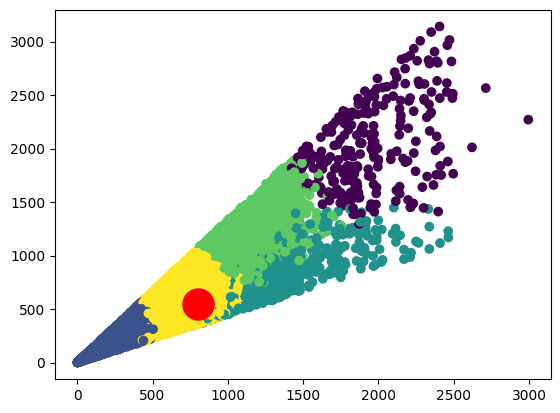

La predicción es: [4]


In [ ]:
np.random.seed(42) #Vamos a tomar las mismas semillas
#1. Construimosla estuctura del modelo
k=5   #5 montoncitos de datos
mkm=KMeans(n_clusters=k)
mkm.fit(XD)

centroids=mkm.cluster_centers_
print( "Los centroides son los siguientes:\n",centroids)

plt.figure()
plt.scatter(XD[:,1],XD[:,2],c=mkm.labels_,cmap='viridis') #Esta gráfica me permite agrupar los datos por colores
plt.scatter(XDp[:,1],XDp[:,2],marker='o',s=500,facecolors='red') #Es graficar el paciente o la pacienta
plt.show()

ydpkm=mkm.predict(XDp)
print("La predicción es:",ydpkm)



2. Se procede con la caracterización de cada cluster.
- Número de perosnas en el cluster
- Número de Aprobados por clsuter
-Número de Negados por cluster
- Elemto de lista

In [ ]:
labels=mkm.labels_
print("Los labels son:\n",labels) #Esto inidca el lugar en el que cayó cada persona

counts_1=np.bincount(labels)
print("Los conteos son:\n",counts_1)

c01=len(np.where((labels==0) & (yd==1)) [0] )#Digame cuantos son los preaprobados dentro del primer culster
c00=len(np.where((labels==0) & (yd==0)) [0] )#Digame cuantos son los prenegados dentro del primer culster
print("Los preaprobados en el cluster 1 son:",c01/ (c00+c01))
print("Los prenegados en el cluster 1 son:",c00/ (c00+c01))

c11=len(np.where((labels==1) & (yd==1)) [0] )#Digame cuantos son los preaprobados dentro del primer culster
c10=len(np.where((labels==1) & (yd==0)) [0] )#Digame cuantos son los prenegados dentro del primer culster
print("Los preaprobados en el cluster 2 son:",c11 )
print("Los prenegados en el cluster 2 son:",c10)

c21=len(np.where((labels==2) & (yd==1)) [0] )#Digame cuantos son los preaprobados dentro del primer culster
c20=len(np.where((labels==2) & (yd==0)) [0] )#Digame cuantos son los prenegados dentro del primer culster
print("Los preaprobados en el cluster 3 son:",c21 )
print("Los prenegados en el cluster 3 son:",c20)

c31=len(np.where((labels==4) & (yd==1)) [0] )#Digame cuantos son los preaprobados dentro del primer culster
c30=len(np.where((labels==4) & (yd==0)) [0] )#Digame cuantos son los prenegados dentro del primer culster
print("Los preaprobados en el cluster 4 son:",c31 )
print("Los prenegados en el cluster 4 son:",c30)

c41=len(np.where((labels==4) & (yd==1)) [0] )#Digame cuantos son los preaprobados dentro del primer culster
c40=len(np.where((labels==4) & (yd==0)) [0] )#Digame cuantos son los prenegados dentro del primer culster
print("Los preaprobados en el cluster 5 son:",c41 )
print("Los prenegados en el cluster 5 son:",c40)






Los labels son:
 [3 1 4 ... 4 4 3]
Los conteos son:
 [ 272 2075  485  971 2039]
Los preaprobados en el cluster 1 son: 0.9595588235294118
Los prenegados en el cluster 1 son: 0.04044117647058824
Los preaprobados en el cluster 2 son: 269
Los prenegados en el cluster 2 son: 1806
Los preaprobados en el cluster 3 son: 472
Los prenegados en el cluster 3 son: 13
Los preaprobados en el cluster 4 son: 1136
Los prenegados en el cluster 4 son: 903
Los preaprobados en el cluster 5 son: 1136
Los prenegados en el cluster 5 son: 903
